# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Perth"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
response = requests.get(query_url).json()
response

{'coord': {'lon': 115.8333, 'lat': -31.9333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 22.41,
  'feels_like': 21.8,
  'temp_min': 19.88,
  'temp_max': 23.7,
  'pressure': 1018,
  'humidity': 42},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 220},
 'clouds': {'all': 0},
 'dt': 1682162087,
 'sys': {'type': 2,
  'id': 63154,
  'country': 'AU',
  'sunrise': 1682116890,
  'sunset': 1682156924},
 'timezone': 28800,
 'id': 2063523,
 'name': 'Perth',
 'cod': 200}

In [76]:
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = response['coord']['lat']
city_lng = response['coord']['lon']
city_max_temp = response['main']['temp_max']
city_humidity = response['main']['humidity']
city_clouds = response['clouds']['all']
city_wind = response['wind']['speed']
city_country = response['sys']['country']
city_date = response['dt']

print({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

{'City': 'Perth', 'Lat': -31.9333, 'Lng': 115.8333, 'Max Temp': 23.7, 'Humidity': 42, 'Cloudiness': 0, 'Wind Speed': 3.09, 'Country': 'AU', 'Date': 1682162087}


In [77]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | pacific grove
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 5 of Set 1 | khorixas
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | castillos
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | piacabucu
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | alice springs
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | kimbe
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | fort stockton
Processing Record 20 of Set 1 | valparaiso
P

In [78]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [79]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,0.01,90,99,5.22,RU,1682162122
1,pacific grove,36.6177,-121.9166,10.86,94,0,1.79,US,1682161757
2,saipan,15.1355,145.7010,27.39,100,100,5.66,MP,1682162316
3,khorixas,-20.3667,14.9667,28.23,33,100,3.66,NA,1682162316
4,castillos,-34.1667,-53.8333,13.79,91,99,2.11,UY,1682162317


In [80]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [81]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,0.01,90,99,5.22,RU,1682162122
1,pacific grove,36.6177,-121.9166,10.86,94,0,1.79,US,1682161757
2,saipan,15.1355,145.7010,27.39,100,100,5.66,MP,1682162316
3,khorixas,-20.3667,14.9667,28.23,33,100,3.66,NaN,1682162316
4,castillos,-34.1667,-53.8333,13.79,91,99,2.11,UY,1682162317


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

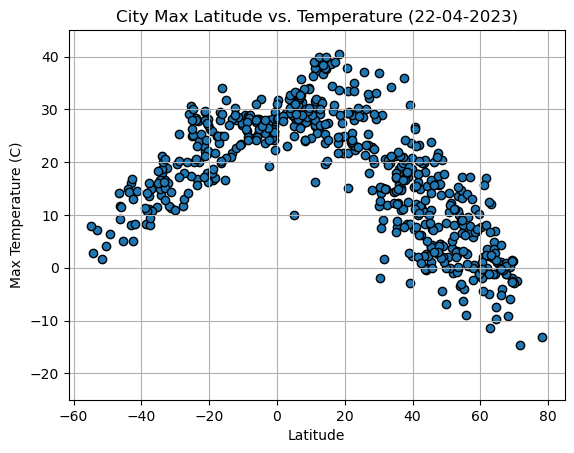

In [82]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(-25, 45)
plt.title("City Max Latitude vs. Temperature (22-04-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

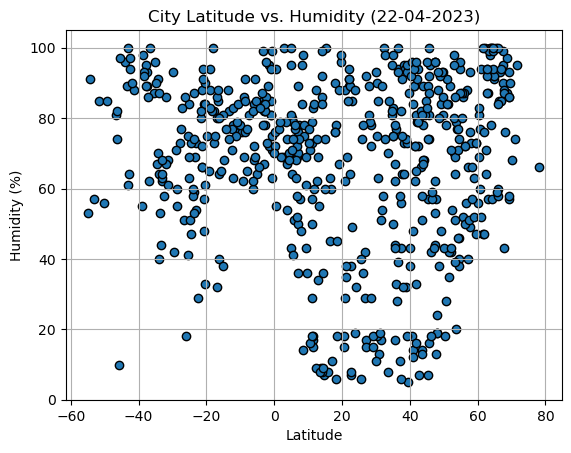

In [83]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(0, 105)
plt.title("City Latitude vs. Humidity (22-04-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

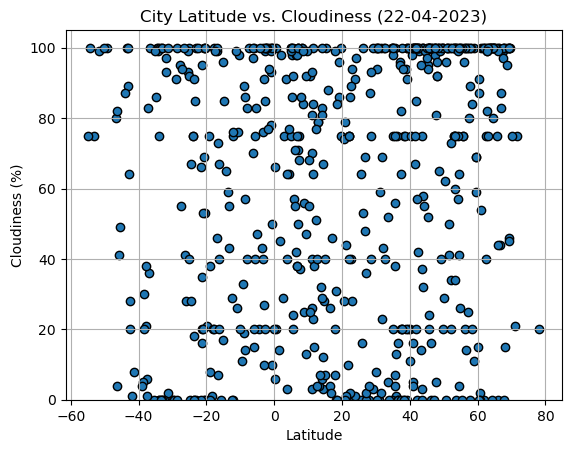

In [84]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(0, 105)
plt.title("City Latitude vs. Cloudiness (22-04-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

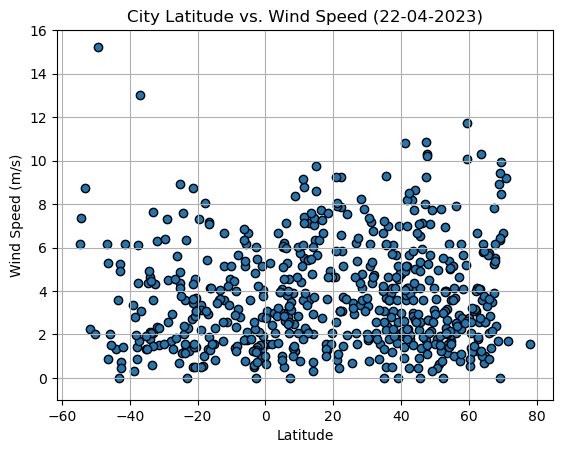

In [85]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(-1, 16)
plt.title("City Latitude vs. Wind Speed (22-04-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,"text_placement",fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    return line_eq

In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,0.01,90,99,5.22,RU,1682162122
1,pacific grove,36.6177,-121.9166,10.86,94,0,1.79,US,1682161757
2,saipan,15.1355,145.7010,27.39,100,100,5.66,MP,1682162316
11,bethel,41.3712,-73.4140,11.22,89,100,3.60,US,1682162222
15,fort stockton,30.8940,-102.8793,15.03,13,0,6.17,US,1682162318


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,khorixas,-20.3667,14.9667,28.23,33,100,3.66,NaN,1682162316
4,castillos,-34.1667,-53.8333,13.79,91,99,2.11,UY,1682162317
5,adamstown,-25.0660,-130.1015,24.86,84,100,8.90,PN,1682162094
6,piacabucu,-10.4056,-36.4344,27.04,76,98,4.54,BR,1682162317
7,blackmans bay,-43.0167,147.3167,16.07,61,89,5.24,AU,1682162317


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7252557349420783


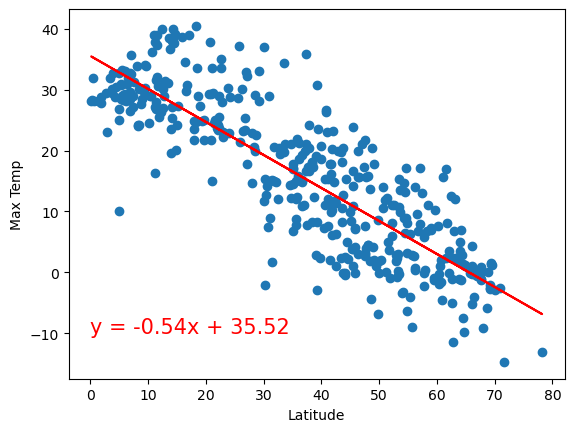

In [94]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
func = linear_regression(x_values,y_values)
plt.annotate(func,(0,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.6544026615647875


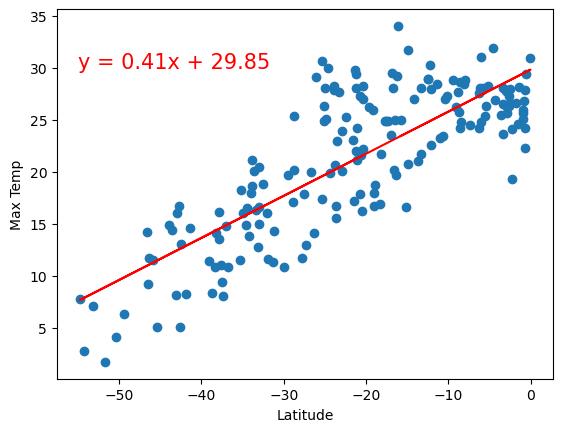

In [97]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
func1 = linear_regression(x_values,y_values)
plt.annotate(func1,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04105072061339506


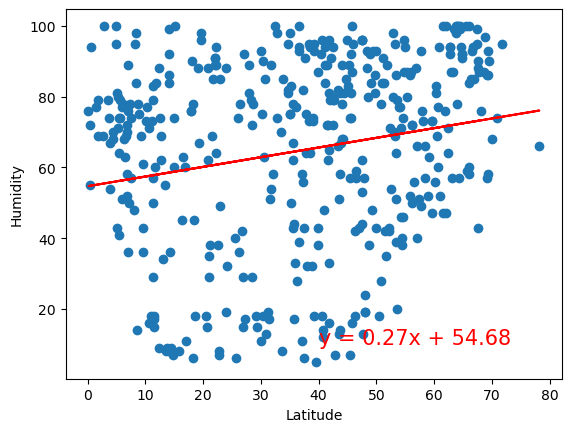

In [98]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
func2 = linear_regression(x_values,y_values)
plt.annotate(func2,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.006313501934300413


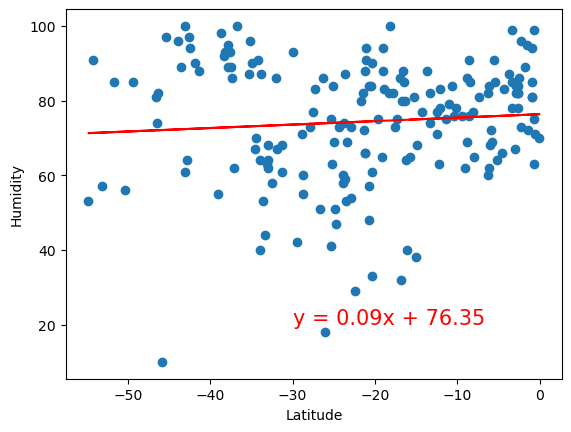

In [101]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
func3 = linear_regression(x_values,y_values)
plt.annotate(func3,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02834048651899364


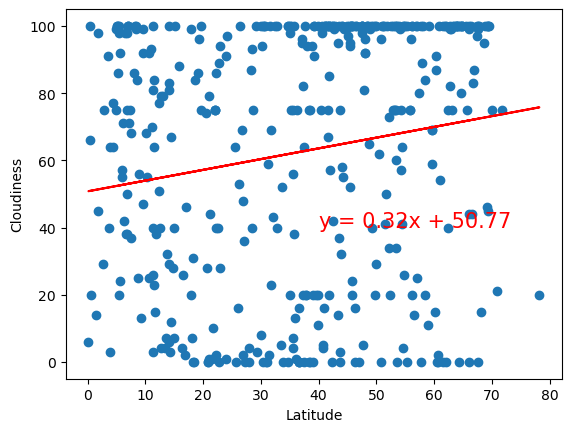

In [104]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
func4 = linear_regression(x_values,y_values)
plt.annotate(func4,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.005782590463877626


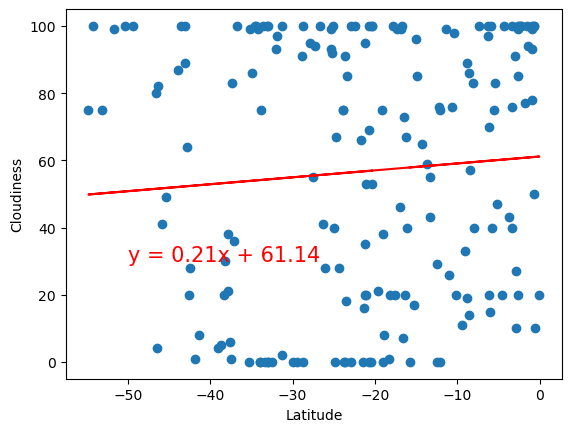

In [105]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
func5 = linear_regression(x_values,y_values)
plt.annotate(func5,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0002893329314041823


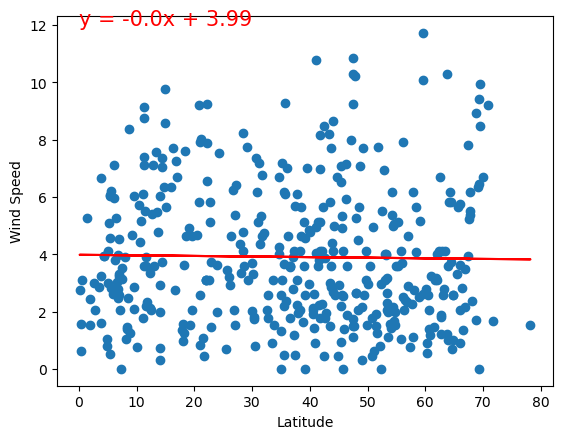

In [107]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
func6 = linear_regression(x_values,y_values)
plt.annotate(func6,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.02264622991951962


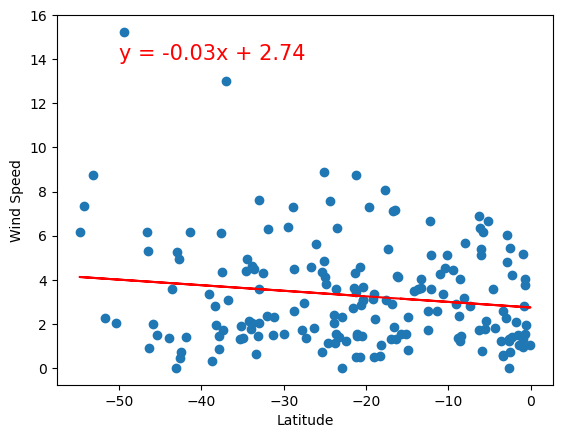

In [109]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
func7 = linear_regression(x_values,y_values)
plt.annotate(func7,(-50,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE